<a href="https://colab.research.google.com/github/yuvalofek/FinancialSignalProcessing/blob/main/FSP_PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt 

# Be a Financial Engineer!

In [ ]:
RATE = 0.1
def c(s_T,K):
  '''
  Call option at time T with security price s_T and strike price K
  '''
  return np.maximum(s_T-K, 0)
def p(s_T, K):
  '''
  Put option at time T with security price s_T and strike price K
  '''
  return np.maximum(K-s_T, 0)
def d_c(s_T, K):
  '''
  Digital call option at time T with security price s_T and strike price K
  '''
  return (s_T>K)*1
def d_p(s_T,K):
  '''
  Digital put option at time T with security price s_T and strike price K
  '''
  return (s_T<K)*1

###1a 
$V(S_T)$ for: long call, long put, short call, short put.

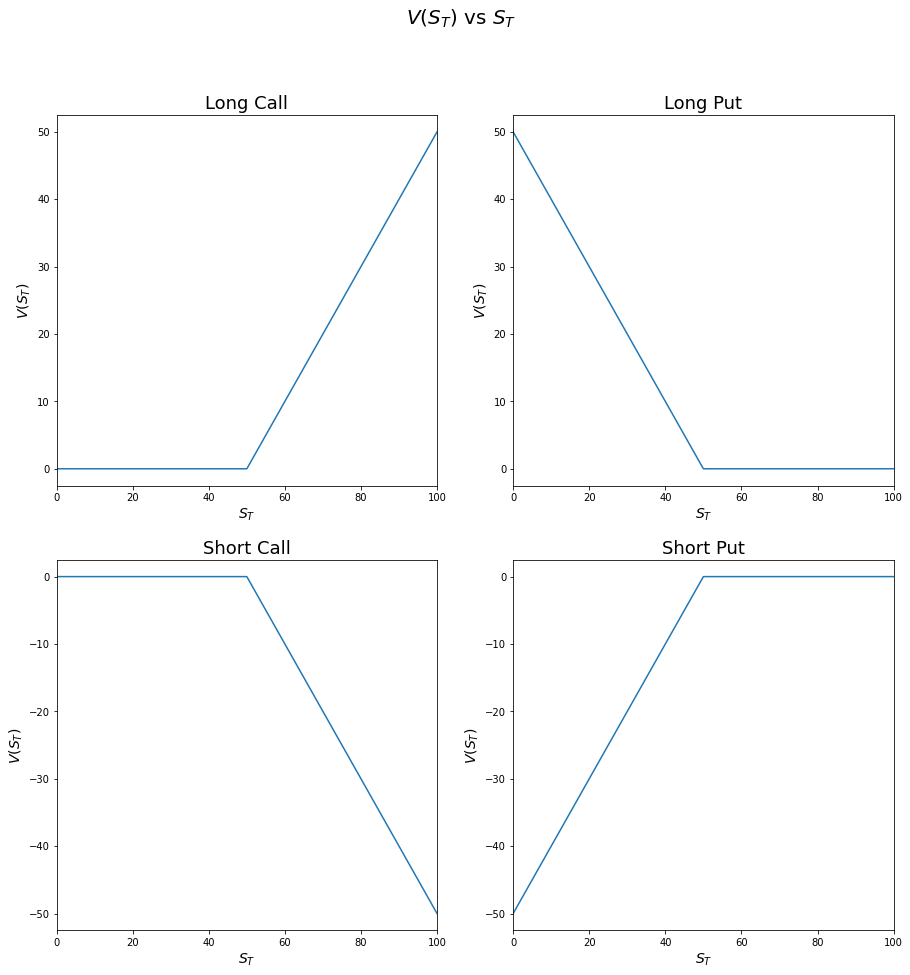

In [ ]:
#Parameters
N = 1000
s_Tmx = 100
K = 50

s_T = np.linspace(0,s_Tmx,N)


fig, axes = plt.subplots(2,2, figsize = (15,15))
fig.suptitle(r'$V(S_T)$ vs $S_T$', fontsize = 20)
axes[0,0].plot(s_T,c(s_T,K))
axes[0,0].set_title('Long Call', fontsize = 18)

axes[0,1].plot(s_T,p(s_T,K))
axes[0,1].set_title('Long Put', fontsize = 18)

axes[1,0].plot(s_T,-c(s_T,K))
axes[1,0].set_title('Short Call', fontsize = 18)

axes[1,1].plot(s_T,-p(s_T,K))
axes[1,1].set_title('Short Put', fontsize = 18)

for ax in axes.flat:
    ax.set(xlabel=r'$S_T$',
           ylabel=r'$V(S_T)$',
           xlim = (0,s_Tmx))
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
plt.show()

##1b.  Straddle 
One unit of a call and one unit of a put for the
same security at the same strike price K.

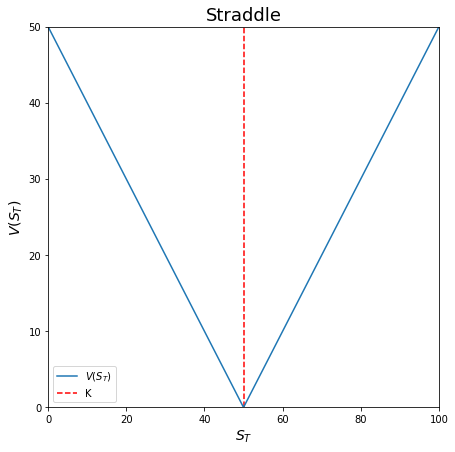

In [ ]:
#straddle 
plt.figure(figsize = (7,7))
plt.plot(s_T, c(s_T,K)+p(s_T,K))
plt.title('Straddle', fontsize = 18)
plt.xlabel(r'$S_T$', fontsize = 14)
plt.ylabel(r'$V(S_T)$', fontsize = 14)
plt.vlines(K, 0, 50, 'r', '--')
plt.ylim(0, 50);
plt.xlim(0,s_Tmx)
plt.legend([r'$V(S_T)$', 'K'])
plt.show()

#We indeed see that this is exactly |S_T - K|

## 1c. Call-Put Spread
long a call at $K_1$ and short a call at $K_2$ with $K_1 < K_2$.
Graph $V (S_T)$ for one choice of the pair $K_1$, $K_2$.

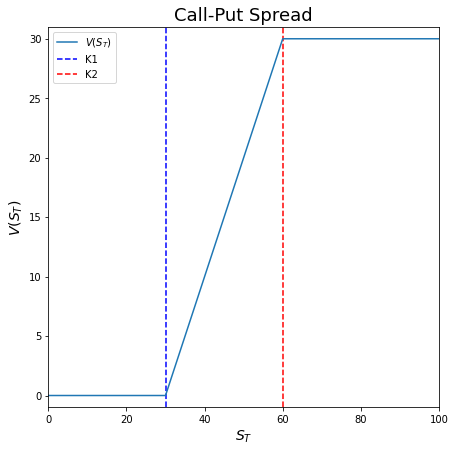

In [ ]:
#call-put spread
K1 = 30
K2 = 60
ymin = -1
ymax = 31

plt.figure(figsize = (7,7))
plt.plot(s_T, c(s_T,K1)-c(s_T,K2))
plt.title('Call-Put Spread', fontsize = 18)
plt.xlabel(r'$S_T$', fontsize = 14)
plt.ylabel(r'$V(S_T)$', fontsize = 14)
plt.ylim(ymin, ymax)
plt.xlim(0,s_Tmx)
plt.vlines(K1, ymin, ymax, 'b',  'dashed')
plt.vlines(K2, ymin, ymax, 'r',  'dashed')
plt.legend([r'$V(S_T)$', 'K1', 'K2'])
plt.show()

## 1d. Butterfly 
a combination of the following. Let $K_1 < K_2$, and $0 < \lambda < 1$. Let
$K^* = K_1 + (1-\lambda) K_2$. Then:

*   long $\lambda$ calls at strike price $K_1$
*   long (1 - $\lambda$) calls at strike price $K_2$.
*   short 1 call at strike price $K^*$

Fix one choice for $K_1 < K_2$. Graph a butterfly $V (S_T)$ for each of the following cases: $\lambda = 1/3, 1/2, 2/3$.

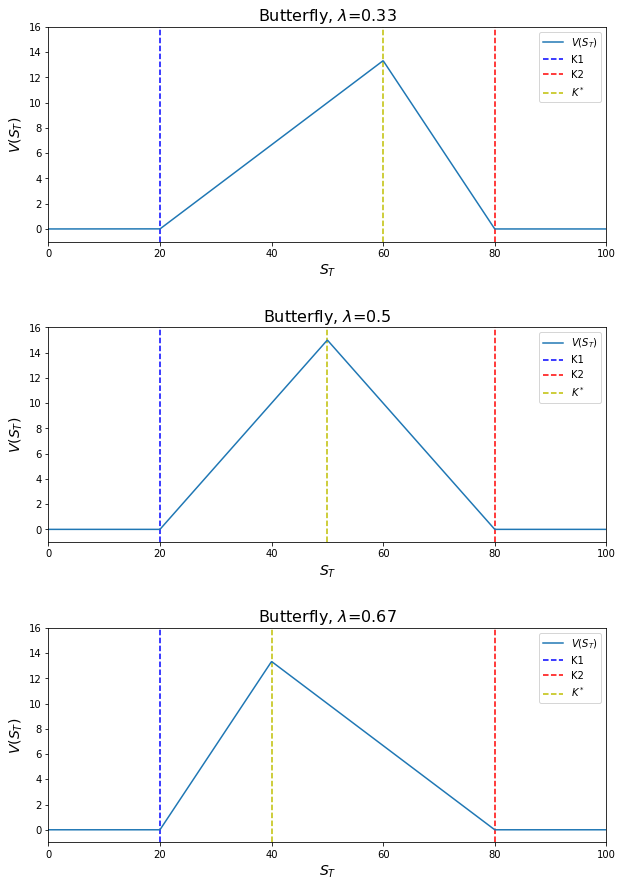

In [ ]:
##butterfly
K1 = 20
K2 = 80
ymin = -1
ymax = 16
fig, axes = plt.subplots(3,1, figsize = (10,15), )
fig.subplots_adjust(hspace =0.4)

lambd = np.array([1/3, 0.5, 2/3])
K_star = lambd*K1 + (1-lambd)*K2

for i in range(len(lambd)):
  axes[i].plot(s_T, lambd[i]*c(s_T,K1)+(1-lambd[i])*c(s_T,K2)-c(s_T,K_star[i]))
  axes[i].set_title(r'Butterfly, $\lambda$='+str(np.around(lambd[i],2)),
                    fontsize = 16)
  axes[i].vlines(K1, ymin, ymax, 'b',  'dashed')
  axes[i].vlines(K2, ymin, ymax, 'r',  'dashed')
  axes[i].vlines(K_star[i], ymin, ymax, 'y',  'dashed')
  axes[i].legend([r'$V(S_T)$', 'K1', 'K2', r'$K^*$'])

for ax in axes.flat:
    ax.set(xlabel=r'$S_T$',
           ylabel=r'$V(S_T)$',
           xlim = (0,s_Tmx),
           ylim = (ymin, ymax)
           )
    ax.xaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontsize(14)
plt.show()

## 1e. Call Ladder
with $K_1 < K_2 < K_3$, long one $K_1$ call, short one $K_2$ call, short one
$K_3$ call.

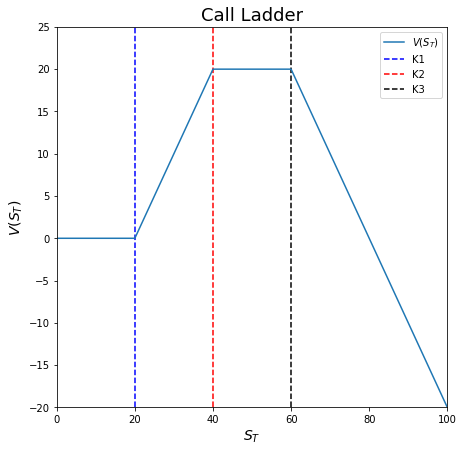

In [ ]:
#Call Ladder 
K1 = 20
K2 = 40
K3 = 60
ymin = -20
ymax = 25

plt.figure(figsize = (7,7))
plt.plot(s_T, c(s_T,K1)-c(s_T,K2)-c(s_T, K3))
plt.title('Call Ladder', fontsize = 18)
plt.xlabel(r'$S_T$', fontsize = 14)
plt.ylabel(r'$V(S_T)$', fontsize = 14)
plt.ylim(ymin, ymax)
plt.xlim(0,s_Tmx)
plt.vlines(K1, ymin, ymax, 'b',  'dashed')
plt.vlines(K2, ymin, ymax, 'r',  'dashed')
plt.vlines(K3, ymin, ymax, 'k',  'dashed')
plt.legend([r'$V(S_T)$', 'K1', 'K2', 'K3'])
plt.show()


## 1f. Digital Call Spread
with $K_1 < K_2$, a long a digital call with strike $K_1$ and short
a digital call with strike $K_2$.

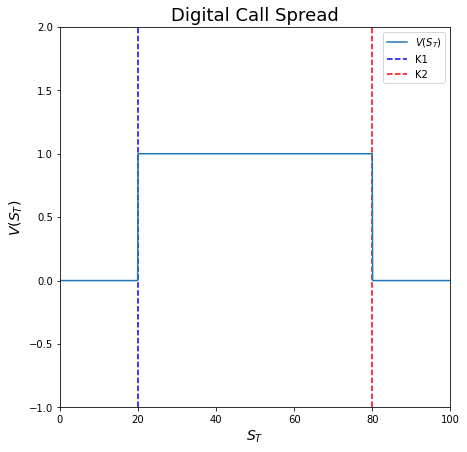

In [ ]:
#digital call spread
K1 = 20
K2 = 80
ymin = -1
ymax = 2
plt.figure(figsize = (7,7))
plt.plot(s_T, d_c(s_T,K1)-d_c(s_T,K2))
plt.title('Digital Call Spread', fontsize = 18)
plt.xlabel(r'$S_T$', fontsize = 14)
plt.ylabel(r'$V(S_T)$', fontsize = 14)
plt.ylim(ymin, ymax)
plt.xlim(0,s_Tmx)
plt.vlines(K1, ymin, ymax, 'b',  'dashed')
plt.vlines(K2, ymin, ymax, 'r',  'dashed')
plt.legend([r'$V(S_T)$', 'K1', 'K2'])
plt.show()

#Binomial Asset Pricing Model


##2.a
Q: What is the distribution of $S_n$?

A: We first ignore the assumption that $S_0 = 1$, just to get a more general answer: 



\begin{equation}
S_1 =
  \begin{cases} 
    u*S_0, & with\,probability: \; (p) \\
    d*S_0, & with\,probability: \; (1-p) 
  \end{cases}
\end{equation}

\begin{equation}
S_2 =
  \begin{cases} 
    u^2*S_0, & with\,probability: \; (p), \\
    u*d*S_0, & with\, probability:\; (2*p*q), \\
    d^2*S_0, & with\,probability: \; (1-p) 
  \end{cases}
\end{equation}

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad \vdots $

\begin{equation}
  S_n =  u^k * d^{n-k} * S_0, \;with\,probability:\; (\binom{n}{k} * p^k * q^{n-k}), \;0\leq k\leq n.
\end{equation}



---


Q: $R_n = log(S_n/S_0)$, show that $R_n = c_n*Y_n + d_n$ for some constant $c_n$ & $d_n$:

A:  We first notice that $k \sim Binomial(n,p)$. Thus we have:

\begin{equation}
  R_n = log (S_n/S_0) \\
    \rightarrow R_n = log(u^k * d^{n-k})\\
    \rightarrow R_n = k*log(u) + (n-k)*log(d) \\
    \rightarrow R_n = k*log(u/d) + n*log(d) \\\\
    \implies c_n = log(u/d),\; d_n = n*log(d)
\end{equation}

##2.b

Parameters


In [ ]:
N = 5
SEED = 25

r1 = 0.05
u1 = 1.1
d1 = 1.01
S0 = 1

p_tilda1 = ((1+r1)-d1)/(u1-d1)


npr.seed(25)
#We can get K by K = (1+R)^N * S0, like putting S0 into the money market
K1 = S0*(1+r1)**N

def ER_call(Sn, K = K1):
  return np.maximum(0, Sn-K)

Getting $V_0$ by going through all paths

In [ ]:
def get_all_paths(N):
  #Thanks to https://stackoverflow.com/questions/22227595/
  #    convert-integer-to-binary-array-with-suitable-padding
  d = np.arange(0,2**N)
  m = N
  return (((d[:,None] & (1 << np.arange(m)))) > 0).astype(int)

def V0_all_paths(N, V, K, p_tilda, u, d, r, S0= S0):
  
  #Get all the paths and find the number of heads in each
  W_ns = get_all_paths(N)
  numH= np.sum(W_ns, axis = 1)
  #calculate the probabilities and the S_N for each path
  probs = (p_tilda**numH) * (1-p_tilda)**(N-numH)
  SN = (u**numH)*(d)**(N-numH)*S0

  #finish up with an expectation over V_N going over all paths
  V_N = V(SN,K)
  V0 = np.sum((V_N*probs)/(1+r)**N)
  return V0

In [ ]:
V0_all_paths(N, ER_call, K1, p_tilda1, u1, d1, r1)

0.039031475205349914

Getting $V_0$ by getting all paths recursively

In [ ]:
def repl_portf(Vn_H, Vn_T, u, d, r, p_tilda, Wn = np.empty(0), S0= S0):
  Sn = S0
  if len(Wn) != 0:
    numH = np.sum(Wn)
    Sn = (u**numH)*(d)**(len(Wn)-numH)*S0
  Snp1H = Sn*u
  Snp1T = Sn*d

  delta_n = (Vn_H - Vn_T)/(Snp1H - Snp1T)
  V_n = 1/(1+r)*np.sum(Vn_H*p_tilda +Vn_T*(1-p_tilda))

  return delta_n, V_n

def V0_recurse (N, V, u, d, r, p_tilda, deltas = None, Wn = np.empty(0),  S0 = S0):
  #base case: if path is N long, compute S_N and then V(S_N) and return 
  if deltas is None: 
    deltas = np.full(shape = (2**(N-1), N), fill_value = np.inf)
  if len(Wn) == N:
    numH = np.sum(Wn)
    SN = (u**numH)*(d)**(N-numH)*S0
    return V(SN), deltas
  
  numH = np.sum(Wn)
  Snp1H = S0*u**(numH+1)*d**(len(Wn)-numH)
  Snp1T = S0*u**(numH)*d**(len(Wn)+1-numH)

  #from these values, get the V_{n+1}s recursively, keep the delta matrix
  V_np1H, deltas = V0_recurse (N, V, u, d, r, p_tilda,
                               deltas, np.append(Wn, np.array(1)))
  V_np1T, deltas = V0_recurse (N, V,u, d, r, p_tilda,
                               deltas, np.append(Wn, np.array(0)))
  
  #return V_0
  delta_n, V_0 = repl_portf(V_np1H, V_np1T, u, d, r, p_tilda, Wn)
  
  #A bit of a hack to get the deltas in a nice format
  #Loop through the possible value that the delta should go to until
  #one isn't infinity. Once found, insert the delta_n there. 
  #This generates a matrix where all rows are different paths
  for i in range(0, deltas.shape[0], 2**(N-len(Wn)-1)):
    if not(np.isfinite(deltas[i, len(Wn)])):
      deltas[i:i+2**(N-len(Wn)-1), len(Wn)] = delta_n
      break

  return (V_0, deltas)

In [ ]:
(V_0, deltas) = V0_recurse(5, ER_call,u1, d1, r1, p_tilda1)
V_0

0.039031475205349914

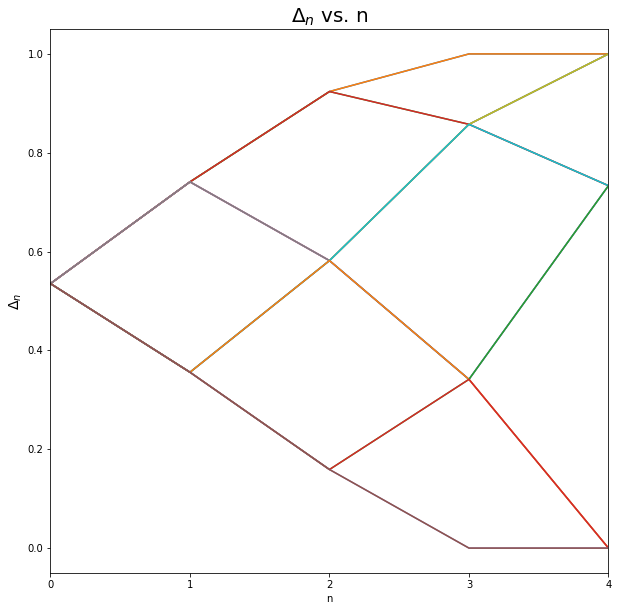

In [ ]:
#plotting
plt.figure(figsize = (10,10))
for i in range(deltas.shape[0]):
  plt.plot(np.arange(0,5), deltas[i,:])
  plt.xlabel('n')
plt.ylabel(r'$\Delta_n$', fontsize = 14)
plt.title(r'$\Delta_n$ vs. n', fontsize = 20)
plt.xlim(0, N-1)
plt.xticks(np.arange(0,N))
#plt.ylim(-0.1,1.1)
plt.show()

##2.c

Monte Carlo

In [ ]:
def MC(N, m, u, d, r, p, V = None, K = K1, S0 = S0, seed = SEED):
  npr.seed(SEED)
  numHs = npr.binomial(N, p, size= m)
  S_N = (u**numHs)*(d)**(N-numHs)*S0
  if V is None:
    value =  np.sum(S_N)/(m*(1+r)**N)
  else:
    value =  np.sum(V(S_N, K))/(m*(1+r)**N)
  return value

###2c1

Estimating $V_0$ and $S_0$ for N = 5 and M = 1,5,10,32 (in that order)


In [ ]:
M_vals = [1,5,10,32, 1000]

S_0 = np.ndarray(shape = (len(M_vals)))
V_0 = np.ndarray(shape = (len(M_vals)))
for i,m in enumerate(M_vals):
  S_0[i] = MC(N,m, u1, d1, r1, p_tilda1)
  V_0[i] = MC(N,m, u1, d1, r1, p_tilda1, ER_call)
  
print('M:\t\t\t1\t  5\t    10\t       32\t 1000')
print('S_0 Estimations:', S_0)
print('V_0 Estimations:', V_0)

M:			1	  5	    10	       32	 1000
S_0 Estimations: [1.06383508 0.97821834 0.97821834 0.9902049  1.00014637]
V_0 Estimations: [0.06383508 0.01276702 0.01276702 0.02311514 0.03809687]


We can see how the $V_0$ is going towards the values we got earlier. This became even clearer when I added M = 1000 to the list. 

###2c2

In [ ]:
N = 100
r2 = 1e-3
u2 = 1+5e-3
d2 = 1+1e-4

p_tilda2 = ((1+r2)-d2)/(u2-d2)
K2 = S0*(1+r2)**N

In [ ]:
##Checking for different M
M_vals2 = [2,4,8,16,32]

S_0 = np.ndarray(shape = (len(M_vals2)))
for i,m in enumerate(M_vals2):
  S_0[i] = MC(N,m, u2, d2, r2, p_tilda2)


print('M:\t\t\t2\t  4\t    8\t       16\t  32')
print('S_0 Estimations:', S_0)

M:			2	  4	    8	       16	  32
S_0 Estimations: [1.01281716 0.9993634  0.99689727 0.99534967 0.99906657]


All seems good, we are gettng S_0 ~ 1

In [ ]:
V_0 = np.ndarray(shape = (len(M_vals)))
for i,m in enumerate(M_vals):
  V_0[i] = MC(N,m, u2, d2, r2, p_tilda2, ER_call, K2)


print('M:\t\t\t1\t  5\t    10\t       32\t 1000')
print('V_0 Estimations:', V_0)

M:			1	  5	    10	       32	 1000
V_0 Estimations: [0.02271723 0.00512687 0.00363823 0.00504928 0.00761259]


It appearrs that the resulting $V_0$ should be somewhere around 0.007 for the new values and $N = 100$

#### Calculations for $V_{10}$
I saw that this calculation essentially was the same as before, just going $N-10$ deep as opposed to $N$ and also starting at $S_{10}$ for the given $\omega_{10}$ as opposed to $S_0$. 

In [ ]:
S10_H = S0*u2**10
S10_T = S0*d2**10

V_10H = np.ndarray(shape = (len(M_vals)))
V_10T = np.ndarray(shape = (len(M_vals)))
for i,m in enumerate(M_vals):
  V_10H[i] = MC(N-10,m, u2, d2, r2, p_tilda2, ER_call, K2, S10_H)
  V_10T[i] = MC(N-10,m, u2, d2, r2, p_tilda2, ER_call, K2, S10_T )


print('M:\t\t\t\t\t   1\t      5\t\t10\t    32\t     1000')
print('V_10 Estimations, previous 10 Heads:', V_10H)
print('V_10 Estimations, previous 10 Tails:', V_10T)

M:					   1	      5		10	    32	     1000
V_10 Estimations, previous 10 Heads: [0.06413577 0.03932609 0.03776749 0.04008627 0.04148629]
V_10 Estimations, previous 10 Tails: [0.01289704 0.00257941 0.0012897  0.00249967 0.00376811]


As expected, the value when we have 10 tails is less than that for when we start with 10 heads

####$p_0$ changes

In [ ]:
S_0_09 = np.ndarray(shape = (len(M_vals)))
V_0_09 = np.ndarray(shape = (len(M_vals)))
S_0_11 = np.ndarray(shape = (len(M_vals)))
V_0_11 = np.ndarray(shape = (len(M_vals)))

for i,m in enumerate(M_vals):
  S_0_09[i] =  MC(N,m, u2, d2, r2, p_tilda2*0.9)
  V_0_09[i] = MC(N,m, u2, d2, r2, p_tilda2*0.9, ER_call, K2)
  S_0_11[i] =  MC(N,m, u2, d2, r2, p_tilda2*1.1)
  V_0_11[i] =  MC(N,m, u2, d2, r2, p_tilda2*1.1, ER_call, K2)
  
print('M:\t\t\t\t  1\t      5\t\t 10\t   32\t     1000')
print('S_0 Estimations for 0.9*P^~:', S_0_09)
print('V_0 Estimations for 0.9*P^~:', V_0_09)
print('\n')
print('S_0 Estimations for 1.1*P^~:', S_0_11)
print('V_0 Estimations for 1.1*P^~:', V_0_11)

M:				  1	      5		 10	   32	     1000
S_0 Estimations for 0.9*P^~: [1.01276878 0.98937749 0.987908   0.99025389 0.99139292]
V_0 Estimations for 0.9*P^~: [0.01276878 0.00255376 0.00127688 0.00263449 0.00381544]


S_0 Estimations for 1.1*P^~: [1.03276341 1.00792756 1.00594719 1.00766307 1.00936718]
V_0 Estimations for 1.1*P^~: [0.03276341 0.00968986 0.00847831 0.01027257 0.0132871 ]


As $p$ goes up, we have a higher likelyhood of getting 'up', so it makes sense that $V_0$ is greater for the $1.1\tilde{p}$ compared to $0.9\tilde{p}$


**If I told you that your expected return was better than putting it into a money market, you may still have decided not to purchase this option. Why not?**

If the expected return was better, it has no implication of the risk. The risk might be really high, at which point you might not want to purchase the option. 


##2.d

In [ ]:
 def lookback_option(Wn, u, d, r, S0 =S0):
  '''Assume we have a path, Wn that is non-empty'''
  N = len(Wn)
  n = np.arange(1,N+1)

  #number of Hs at each timestamp
  numH = np.cumsum(Wn)
  #Sn at each time
  Sns = (u**numH)*(d)**(n-numH)*S0

  #Including the time value of money forward
  Sn_w = Sns*(1+r)**(N-n)

  #lookback option equation
  return np.max(Sn_w[:-1] - Sn_w[-1])

In [ ]:
def V0_recurse_path_dep (N, V, u, d, r, p_tilda, Wn = np.empty(0), S0 = S0):
  #base case: if path is N-1 long, compute S_N and then V(S_N) and return 
  if len(Wn) == N:
    return V(Wn, u, d, r)

  numH = np.sum(Wn)
  Snp1H = S0*u**(numH+1)*d**(len(Wn)-numH)
  Snp1T = S0*u**(numH)*d**(len(Wn)+1-numH)

  #from these values, get the V_{n+1}s recursively
  V_np1H = V0_recurse_path_dep (N, V, u, d, r, p_tilda, np.append(Wn, np.array(1)))
  V_np1T = V0_recurse_path_dep (N, V,u, d, r, p_tilda, np.append(Wn, np.array(0)))
  #return V_0
  _, V_0 = repl_portf(V_np1H, V_np1T, u, d, r, p_tilda, Wn)

  return V_0

In [ ]:
def MC_path_dep(N, m, u, d, r, p, V = None, S0 = S0, seed = SEED):
  npr.seed(SEED)
  Wns = npr.binomial(1, p, size = (m, N))
  VT = np.ndarray(shape = (m))
  for i in range(m):
    VT[i] = V(Wns[i], u, d, r, S0 =S0)
  return np.sum(VT)/(m*(1+r)**N)

In [ ]:
N = 5
V_0 = V0_recurse_path_dep(N, lookback_option,u1, d1, r1, p_tilda1)
V_0

0.0436623100042377

In [ ]:

M_val = [1, 10, 100, 1_000, 10_000]

V0_MC = np.ndarray(shape = (len(M_val)))
M_str = ''
for i, m in enumerate(M_val):
  V0_MC[i] = MC_path_dep(N, m, u1, d1, r1, p_tilda1, lookback_option)
  M_str += str(m) + '        '

print('M:\t  ', M_str)
print('V_0:', V0_MC)

M:	   1        10        100        1000        10000        
V_0: [0.12071164 0.04888633 0.05064523 0.04113098 0.04386696]


The Monte Carlo and the exact value we get from going over all paths match

###2d2

In [ ]:
N = 100

M_val = [1, 10, 100, 1_000, 10_000]
V0_MC = np.ndarray(shape = (len(M_val)))
V0_MC_09 = np.ndarray(shape = (len(M_val)))
V0_MC_11 = np.ndarray(shape = (len(M_val)))

M_str = ''
for i, m in enumerate(M_val):
  V0_MC[i] = MC_path_dep(N, m, u2, d2, r2, p_tilda2, lookback_option)
  V0_MC_09[i] = MC_path_dep(N, m, u2, d2, r2, (p_tilda2*0.9), lookback_option)
  V0_MC_11[i] = MC_path_dep(N, m, u2, d2, r2, (p_tilda2*1.1), lookback_option)
  
  M_str += str(m) + '        '

print('M:\t\t\t\t     ', M_str)
print('E_{p0}(V_N^~), p0 = 0.9*p^~:\t', V0_MC_09)
print('V_0:\t\t\t\t', V0_MC)
print('E_{p0}(V_N^~), p0 = 1.1*p^~:\t', V0_MC_11)



M:				      1        10        100        1000        10000        
E_{p0}(V_N^~), p0 = 0.9*p^~:	 [0.03953658 0.0167473  0.01692952 0.01782732 0.01850569]
V_0:				 [0.0204957  0.01161356 0.01325806 0.01354813 0.01405035]
E_{p0}(V_N^~), p0 = 1.1*p^~:	 [0.0204957  0.00845909 0.00994886 0.01011811 0.01049628]


We see that $E_{0.9\tilde{p}}(\tilde{V}_N) > V_0 > E_{1.1\tilde{p}}(\tilde{V}_N)$
